# 1.Data loading

In [1]:
import pandas as pd

data = pd.read_csv("/content/drive/Othercomputers/Mój komputer/PROJECTS/Fraud_detection/RAW_DATA/fraudTrain.csv")
test_data=pd.read_csv("/content/drive/Othercomputers/Mój komputer/PROJECTS/Fraud_detection/RAW_DATA/fraudTest.csv")
data.head()  # Wyświetlenie pierwszych wierszy


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


We need to decide how to preprocess which column. Which of them are useless and should be deleted, which are good as they are, and which we must preprocess a little to get more meaningfull data.

**Transaction Info**

-Amount -->AMOUNTS

-trans_date_trans_time -->Date/Time/Day_of_week

-cc_num -->user_id

-merchant --> Merchant_id

-category --> category_fraud_rate(Target Encoding)

-lat -->DISTANCES

-long -->DISTANCES


**Customer Info**

-first --> DEL

-last --> DEL

-gender --> is_M (1,0)

-street -->DEL

-city -->DEL

-state -->state_fraud_rate(Target Encoding)

-zip --->DEL

-city_pop

-job --> job_fraud_rate (Target Encoding)

-dob -->Age

-trans_num -->DEL

**Merchant info**

-merch_lat --> DISTANCES

-merch_long --DISTANCES




**To add based on info we have**

-----DISTANCES-----

-Distance from merchant

-IS New_place

-Distance from last transaction

-----TIMES-----

-Transaction velocity(1h)

-Transaction velocity(24h)

-time since last transation

-----AMOUNTS-----

-Max_transaction amount

-Median transacion amount

-diff_from_median

---


# 2.Deleting useless features

first, last, street, city, zip, trans_num

In [2]:
features_to_delete = ['first', 'last', 'street', 'city', 'zip', 'trans_num','unix_time']
data = data.drop(columns=features_to_delete)
test_data = test_data.drop(columns=features_to_delete)


# 3.Transforming Features

trans_date_trans_time , cc_num , merchant , category, gender , state, job , dob

Renaming, changing type, Encoding

In [3]:
features_to_transform = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'gender', 'state','job','dob']

It is string so at first we must change type

## 3.1 Date preprocessing

We want to turn trans_date_trans_time into 3 seperate new columns: date,day_of_week, time.

In [4]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

In [5]:
data['trans_date_trans_time'][:5]

,trans_date_trans_time
0,2019-01-01 00:00:18
1,2019-01-01 00:00:44
2,2019-01-01 00:00:51
3,2019-01-01 00:01:16
4,2019-01-01 00:03:06


We can now extract time and date

In [6]:
data['trans_date'] = data['trans_date_trans_time'].dt.date
data['trans_time'] = data['trans_date_trans_time'].dt.time
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek

test_data['trans_date'] = test_data['trans_date_trans_time'].dt.date
test_data['trans_time'] = test_data['trans_date_trans_time'].dt.time
test_data['day_of_week'] = test_data['trans_date_trans_time'].dt.dayofweek

In [7]:
data['trans_date'][:5]

,trans_date
0,2019-01-01
1,2019-01-01
2,2019-01-01
3,2019-01-01
4,2019-01-01


In [8]:
data['trans_time'][:5]

,trans_time
0,00:00:18
1,00:00:44
2,00:00:51
3,00:01:16
4,00:03:06


In [9]:
data['day_of_week'][:5]

,day_of_week
0,1
1,1
2,1
3,1
4,1


In [10]:
data.drop(columns=['trans_date_trans_time'], inplace=True)
test_data.drop(columns=['trans_date_trans_time'], inplace=True)

## Target Encoding

This technic is basically calculating average fraud rate per category and putting it as a value in feature. For example states. We can give every state, unique id from 0 to 49, but we can also calcualte fraud rate for every state and just give it straight to our model. This way it do not need to find patterns in fraud rates by state, it can have it immediatelly, thanks to historical data.

It works good in linear models, neural network, and KNN alghorithms.

But it also got some flaws. Tree based models prefer categorical features.
 When the sample of records for category is very small (for example 3 records), then this can really skew model weights. If one of this three records is fraud, then fraud rate for this category will be 33.33% which is of course insanely high.

 So, At first we will check if feature have predispositions for Target Encoding, if it has enough records.

 We don't know for now which models we will use later so features with predispositions will have normal, categorical feature AND Target Encoding feature.

 We will get rid of one after deciding which models we will be using

Distribution ploting function

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_column_distribution(column_name,dataset):

    value_counts = dataset[column_name].value_counts()

    avg_count = value_counts.mean()
    print(f"Average number of transactions per {column_name}: {avg_count:.2f}")

    plt.figure(figsize=(10, 5))
    plt.hist(value_counts, bins=50, edgecolor='black')
    plt.xlabel(f"Number of occurrences per {column_name}")
    plt.ylabel("Number of unique values")
    plt.title(f"Distribution of occurrences for {column_name}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



Target encoding function

In [12]:
import pandas as pd

def target_encode(column,dataset):

    target="is_fraud"

    encoding_map = dataset.groupby(column)[target].mean()

    dataset[f'{column}_fraud_rate'] = dataset[column].map(encoding_map)


## 3.2 Credit Card number

It is basically, id of credit card. It have zero information in itsefl, but it gives historical informations about frads on this card. It basically means that if model found any fraud on this card in the past, it will be more likely to find another one.

We just need to change the way this feature looks. Simple cc_id with integers starting from zero, will be best here.

In [13]:
data['cc_num'][:5]

,cc_num
0,2703186189652095
1,630423337322
2,38859492057661
3,3534093764340240
4,375534208663984


In [14]:
unique_cc_nums = data['cc_num'].unique()

In [15]:
len(unique_cc_nums)

983

We have 924 unique credit cards in our dataset

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['cc_id'] = le.fit_transform(data['cc_num'])

test_data['cc_id'] = test_data['cc_num'].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

data.drop(columns=['cc_num'], inplace=True)
test_data.drop(columns=['cc_num'], inplace=True)

print(data[['cc_id']].head())
print(test_data[['cc_id']].head())


   cc_id
0    444
1     42
2    237
3    509
4    368
   cc_id
0    427
1    584
2    629
3    616
4    493


In [17]:
cc_id_min = data['cc_id'].min()
cc_id_max = data['cc_id'].max()

print(f"Min id: {cc_id_min}")
print(f"Max id: {cc_id_max}")

Min id: 0
Max id: 982


In [18]:
cc_id_min = test_data['cc_id'].min()
cc_id_max = test_data['cc_id'].max()

print(f"Min id: {cc_id_min}")
print(f"Max id: {cc_id_max}")

Min id: -1
Max id: 982


In [19]:
unique_cc_ids = data['cc_id'].nunique()

unique_cc_ids

983

In [20]:
unique_cc_ids = test_data['cc_id'].nunique()

unique_cc_ids

909

## 3.3 Merchant

Merchant is name of the company, to which the transaction gone. We can just simply use merchant_id, but for the report purposes we will left the merchant column also

In [21]:
data['merchant'][:5]

,merchant
0,"fraud_Rippin, Kub and Mann"
1,"fraud_Heller, Gutmann and Zieme"
2,fraud_Lind-Buckridge
3,"fraud_Kutch, Hermiston and Farrell"
4,fraud_Keeling-Crist


In [22]:
data['merchant'] = data['merchant'].str.replace(r'^fraud_', '', regex=True)

test_data['merchant'] = test_data['merchant'].str.replace(r'^fraud_', '', regex=True)

In [23]:
unique_merchants = data['merchant'].unique()

In [24]:
len(unique_merchants)

693

In [25]:
unique_merchants = test_data['merchant'].unique()

In [26]:
len(unique_merchants)

693

There is 693 unique merchants

In [27]:
le = LabelEncoder()

data['merchant_id'] = le.fit_transform(data['merchant'])

test_data['merchant_id'] = le.transform(test_data['merchant'])

data[['merchant_id']].head()


,merchant_id
0,514
1,241
2,390
3,360
4,297


In [28]:
merchant_id_min = data['merchant_id'].min()
merchant_id_max = data['merchant_id'].max()

print(f"Min id: {merchant_id_min}")
print(f"Max id: {merchant_id_max}")

Min id: 0
Max id: 692


In [29]:
merchant_id_min = test_data['merchant_id'].min()
merchant_id_max = test_data['merchant_id'].max()

print(f"Min id: {merchant_id_min}")
print(f"Max id: {merchant_id_max}")

Min id: 0
Max id: 692


In [30]:
unique_merchant_ids = data['merchant_id'].nunique()

unique_merchant_ids

693

Now let's see if this feautre has predispositions for Target Encoding

Average number of transactions per merchant: 1871.10


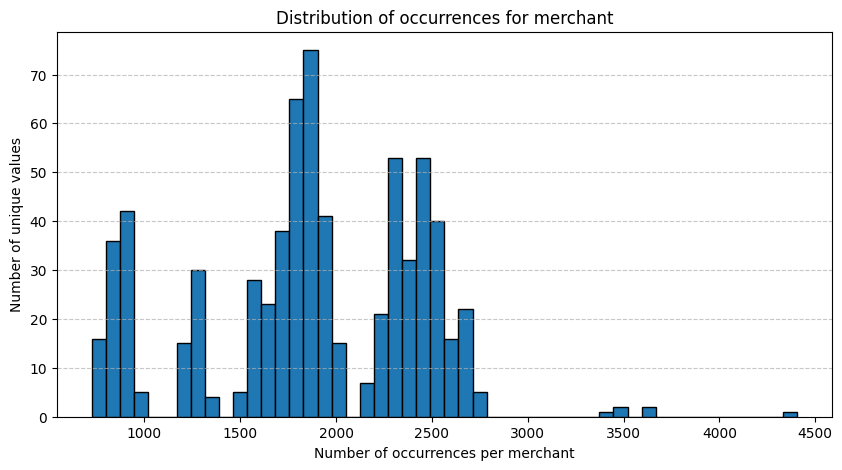

In [31]:
plot_column_distribution('merchant',data)

This feature have predisspositons for Target Ecnoding

In [32]:
target_encode('merchant',data)
target_encode('merchant',test_data)

In [33]:
print(data.columns)


Index(['Unnamed: 0', 'merchant', 'category', 'amt', 'gender', 'state', 'lat',
       'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'day_of_week', 'cc_id', 'merchant_id',
       'merchant_fraud_rate'],
      dtype='object')


## 3.4 Category

Here we will do the same as in merchant

In [34]:
data["category"][:5]

,category
0,misc_net
1,grocery_pos
2,entertainment
3,gas_transport
4,misc_pos


In [35]:
print(f"{len(data['category'].unique())} unique Categories")


14 unique Categories


In [36]:
category_mapping = {category: idx for idx, category in enumerate(data['category'].unique())}

data['category_id'] = data['category'].map(category_mapping)

test_data['category_id'] = test_data['category'].map(category_mapping).fillna(-1).astype(int)

print(data[['category', 'category_id']].head())
print(test_data[['category', 'category_id']].head())


        category  category_id
0       misc_net            0
1    grocery_pos            1
2  entertainment            2
3  gas_transport            3
4       misc_pos            4
         category  category_id
0   personal_care            9
1   personal_care            9
2  health_fitness           10
3        misc_pos            4
4          travel           11


Average number of transactions per category: 92619.64


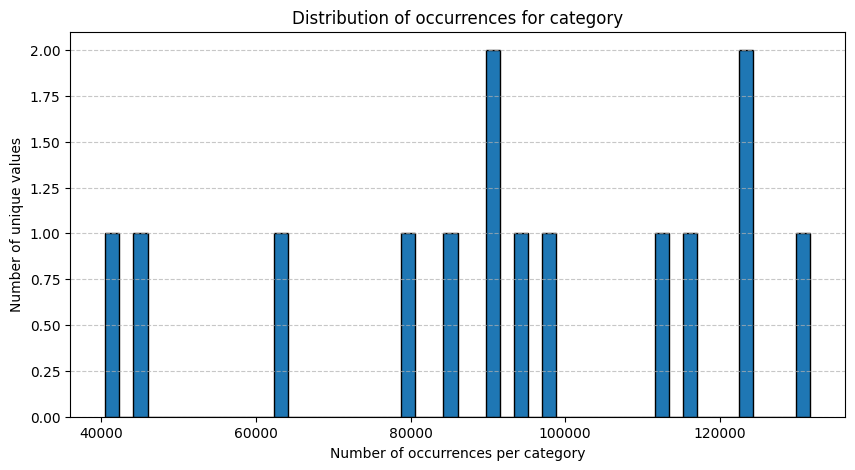

In [37]:
plot_column_distribution('category',data)

This column is ideal for Target Encoding

In [38]:
target_encode('category',data)
target_encode('category',test_data)

## 3.5 Gender

Here, only thing we need to cahnge is format of feature, instead of M for Male and F for female, we will use is_M, 1 if Male, 0 if Female

In [39]:
data.rename(columns={'gender': 'is_M'}, inplace=True)
test_data.rename(columns={'gender': 'is_M'}, inplace=True)

In [40]:
data['is_M'] = data['is_M'].map({'M': 1, 'F': 0})
test_data['is_M'] = test_data['is_M'].map({'M': 1, 'F': 0})

In [41]:
data["is_M"][:5]

,is_M
0,0
1,0
2,1
3,1
4,1


## 3.6 State



In [42]:
data["state"][:5]

,state
0,NC
1,WA
2,ID
3,MT
4,VA


In [43]:
print(f"{len(data['state'].unique())} unique states")


51 unique states


In [44]:
data['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [45]:
state_mapping = {state: idx for idx, state in enumerate(data['state'].unique())}

data['state_id'] = data['state'].map(state_mapping)

test_data['state_id'] = test_data['state'].map(state_mapping).fillna(-1).astype(int)

print(data[['state', 'state_id']].head())
print(test_data[['state', 'state_id']].head())


  state  state_id
0    NC         0
1    WA         1
2    ID         2
3    MT         3
4    VA         4
  state  state_id
0    SC        41
1    UT        29
2    NY        27
3    FL        10
4    MI        19


Average number of transactions per state: 25425.00


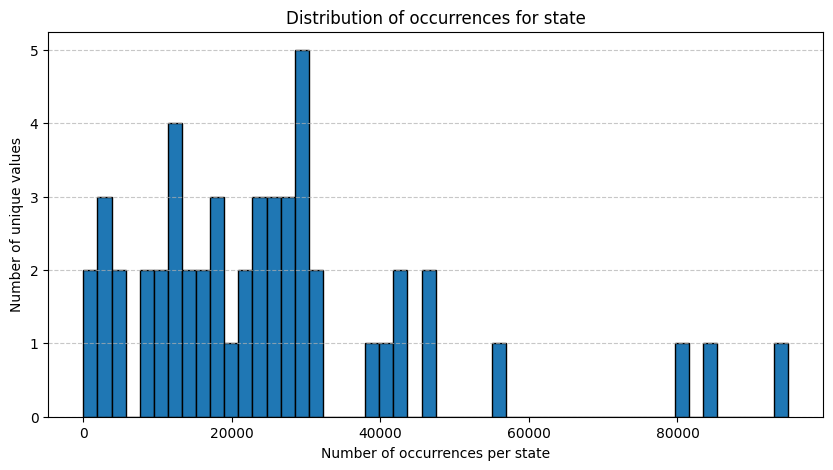

In [46]:
plot_column_distribution('state',data)

In [47]:
import pandas as pd
least_transaction_states = data['state'].value_counts().nsmallest(10)

least_transaction_states_df = least_transaction_states.reset_index()
least_transaction_states_df.columns = ['state', 'transaction_count']

print(least_transaction_states_df)


  state  transaction_count
0    DE                  9
1    RI                550
2    AK               2120
3    HI               2559
4    DC               3613
5    ID               5545
6    NV               5607
7    CT               7702
8    NH               8278
9    UT              10699


Some of the states have not much transactions, but it should be enough to be at least representative sample.

In [48]:
target_encode('state',data)
target_encode('state',test_data)

'job','dob'

## 3.7 Job

In [49]:
data["job"][:5]

,job
0,"Psychologist, counselling"
1,Special educational needs teacher
2,Nature conservation officer
3,Patent attorney
4,Dance movement psychotherapist


In [50]:
print(f"{len(data['job'].unique())} unique jobs")


494 unique jobs


In [51]:
job_mapping = {job: idx for idx, job in enumerate(data['job'].unique())}

data['job_id'] = data['job'].map(state_mapping)
test_data['job_id'] = test_data['job'].map(job_mapping).fillna(-1).astype(int)


Average number of transactions per job: 2624.85


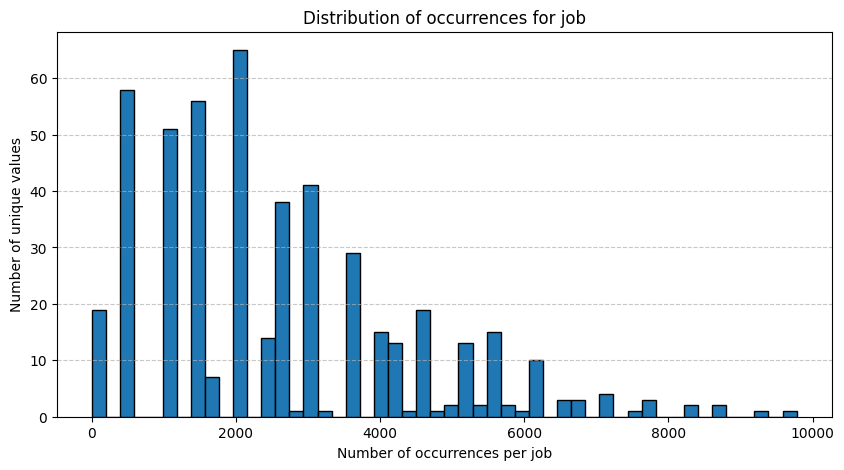

In [52]:
plot_column_distribution('job',data)

In [53]:
len(data['job'].unique())

494

In [54]:
import pandas as pd
least_transaction_jobs = data['job'].value_counts().nsmallest(10)

least_transaction_jobs_df = least_transaction_jobs.reset_index()
least_transaction_jobs_df.columns = ['job', 'transaction_count']

print(least_transaction_jobs_df)

                              job  transaction_count
0                     Ship broker                  7
1      Contracting civil engineer                  7
2               Warehouse manager                  7
3  Armed forces technical officer                  8
4             Information officer                  8
5              Veterinary surgeon                  8
6            Broadcast journalist                  9
7         Forest/woodland manager                  9
8                Industrial buyer                 10
9                       Solicitor                 11


In [55]:
job_counts = data['job'].value_counts()

jobs_below_20 = job_counts[job_counts < 20]

num_jobs_below_20 = len(jobs_below_20)

print(f"Liczba zawodów z mniej niż 20 transakcjami: {num_jobs_below_20}")


Liczba zawodów z mniej niż 20 transakcjami: 19


Some jobs have not enough records to be representative sample. There is only 19 of them and their cumulative amount of transactions is less than 400 so it is not much. We can just get rid of it

In [56]:
job_counts = data['job'].value_counts()

jobs_to_remove = job_counts[job_counts < 20].index.tolist()

data_filtered = data[~data['job'].isin(jobs_to_remove)]

print(f"Liczba usuniętych zawodów: {len(jobs_to_remove)}")
print(f"Liczba rekordów przed: {len(data)}")
print(f"Liczba rekordów po: {len(data_filtered)}")


Liczba usuniętych zawodów: 19
Liczba rekordów przed: 1296675
Liczba rekordów po: 1296468


In [57]:
target_encode('job',data)
target_encode('job',test_data)

## 3.7 Day of birth

We should just simply turn that into 'Age'

In [58]:
data['dob'] = pd.to_datetime(data['dob'])
data['trans_date'] = pd.to_datetime(data['trans_date'])

data['Age'] = (data['trans_date'] - data['dob']).dt.days // 365

data.drop(columns=['dob'], inplace=True)

In [59]:
test_data['dob'] = pd.to_datetime(test_data['dob'])
test_data['trans_date'] = pd.to_datetime(test_data['trans_date'])

test_data['Age'] = (test_data['trans_date'] - test_data['dob']).dt.days // 365

test_data.drop(columns=['dob'], inplace=True)

In [60]:
print(data[['trans_date', 'Age']].head())

  trans_date  Age
0 2019-01-01   30
1 2019-01-01   40
2 2019-01-01   56
3 2019-01-01   52
4 2019-01-01   32


# 4. New features calculating

We will calculate new features based mainly on locations to determine distances of transaction, on dates and times to determine transactions frequency and on amounts to

## 4.1 Distances

-Distance from merchant

-IS New_place

-Distance from last transaction

### 4.1.1 Distance from merchant

Calculating distance between customer's home and place where he spent money

In [61]:
import pandas as pd
from geopy.distance import geodesic

def calculate_distance(row):
    customer_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(customer_location, merchant_location).kilometers

data['distance_from_merchant'] = data.apply(calculate_distance, axis=1)
test_data['distance_from_merchant'] = test_data.apply(calculate_distance, axis=1)

print(data[['lat', 'long', 'merch_lat', 'merch_long', 'distance_from_merchant']].head())


       lat      long  merch_lat  merch_long  distance_from_merchant
0  36.0788  -81.1781  36.011293  -82.048315               78.773821
1  48.8878 -118.2105  49.159047 -118.186462               30.216618
2  42.1808 -112.2620  43.150704 -112.154481              108.102912
3  46.2306 -112.1138  47.034331 -112.561071               95.685115
4  38.4207  -79.4629  38.674999  -78.632459               77.702395


### 4.1.2 is_new_place

checking if customer have ever bought something in this place, based on cc_num

In [62]:
data.columns

Index(['Unnamed: 0', 'merchant', 'category', 'amt', 'is_M', 'state', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'day_of_week', 'cc_id', 'merchant_id',
       'merchant_fraud_rate', 'category_id', 'category_fraud_rate', 'state_id',
       'state_fraud_rate', 'job_id', 'job_fraud_rate', 'Age',
       'distance_from_merchant'],
      dtype='object')

In [63]:
data['rounded_merch_lat'] = data['merch_lat'].round(4)
data['rounded_merch_long'] = data['merch_long'].round(4)

# Count unique merchants after rounding
unique_rounded_coordinates_count = len(set(zip(data['rounded_merch_lat'], data['rounded_merch_long'])))

print(f"Total unique merchant coordinates (after rounding): {unique_rounded_coordinates_count}")
print(f"Number of rows {len(data)}")


Total unique merchant coordinates (after rounding): 1296657
Number of rows 1296675


In [64]:
test_data['rounded_merch_lat'] = test_data['merch_lat'].round(4)
test_data['rounded_merch_long'] = test_data['merch_long'].round(4)

# Count unique merchants after rounding
unique_rounded_coordinates_count = len(set(zip(test_data['rounded_merch_lat'], test_data['rounded_merch_long'])))

print(f"Total unique merchant coordinates (after rounding): {unique_rounded_coordinates_count}")
print(f"Number of rows {len(test_data)}")


Total unique merchant coordinates (after rounding): 555714
Number of rows 555719


So based on, merchants locations, it is always new, instead of 5 records which can be just some error. We should check our feature based on merchants name. It will not be as usable, becuase merchants have alot of lcoations, but new merchant can also give us some information

In [65]:
data['trans_date'] = pd.to_datetime(data['trans_date'])
data['trans_time'] = pd.to_datetime(data['trans_time'], format='%H:%M:%S').dt.time

data = data.sort_values(by=['cc_id', 'trans_date', 'trans_time'])

data['is_new_merchant'] = ~data.duplicated(subset=['cc_id', 'merchant'], keep='first')

data['is_new_merchant'] = data['is_new_merchant'].astype(int)

print(data[['cc_id', 'merchant', 'trans_date', 'trans_time', 'is_new_merchant']].head())

      cc_id                     merchant trans_date trans_time  \
1017      0  Jones, Sawayn and Romaguera 2019-01-01   12:47:15   
2724      0                    Berge LLC 2019-01-02   08:44:57   
2726      0                 Luettgen PLC 2019-01-02   08:47:36   
2882      0                Daugherty LLC 2019-01-02   12:38:14   
2907      0               Beier and Sons 2019-01-02   13:10:46   

      is_new_merchant  
1017                1  
2724                1  
2726                1  
2882                1  
2907                1  


In [66]:
test_data['trans_date'] = pd.to_datetime(test_data['trans_date'])
test_data['trans_time'] = pd.to_datetime(test_data['trans_time'], format='%H:%M:%S').dt.time

test_data = test_data.sort_values(by=['cc_id', 'trans_date', 'trans_time'])

test_data['is_new_merchant'] = ~test_data.duplicated(subset=['cc_id', 'merchant'], keep='first')

test_data['is_new_merchant'] = test_data['is_new_merchant'].astype(int)

print(test_data[['cc_id', 'merchant', 'trans_date', 'trans_time', 'is_new_merchant']].head())

       cc_id                  merchant trans_date trans_time  is_new_merchant
10036     -1               DuBuque LLC 2020-06-24   00:26:45                1
10047     -1  Huel, Hammes and Witting 2020-06-24   00:44:24                1
10167     -1            Murray-Smitham 2020-06-24   02:56:50                1
10193     -1           Heidenreich PLC 2020-06-24   03:21:56                1
10206     -1                Huels-Hahn 2020-06-24   03:33:40                1


In [67]:
new_merchants_count = data['is_new_merchant'].sum()

print(f"Total new merchants: {new_merchants_count}")


Total new merchants: 479072


### 4.1.3 Distance_from_last_transaction

Distance from place where last transaction occured

In [68]:
print(data[['merch_lat', 'merch_long']].dtypes)


merch_lat     float64
merch_long    float64
dtype: object


In [69]:
data['merch_lat'] = pd.to_numeric(data['merch_lat'], errors='coerce')
data['merch_long'] = pd.to_numeric(data['merch_long'], errors='coerce')


In [70]:
test_data['merch_lat'] = pd.to_numeric(test_data['merch_lat'], errors='coerce')
test_data['merch_long'] = pd.to_numeric(test_data['merch_long'], errors='coerce')


In [71]:
print(data[['merch_lat', 'merch_long']].isna().sum())


merch_lat     0
merch_long    0
dtype: int64


In [72]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

data = data.sort_values(by=['cc_id', 'trans_date', 'trans_time'])

data['prev_merch_lat'] = data.groupby('cc_id')['merch_lat'].shift()
data['prev_merch_long'] = data.groupby('cc_id')['merch_long'].shift()

def calculate_geodesic_distance(lat1, lon1, lat2, lon2):
    if np.isnan(lat1) or np.isnan(lon1) or np.isnan(lat2) or np.isnan(lon2):
        return 0
    return geodesic((lat1, lon1), (lat2, lon2)).meters


data['distance_from_last_transaction'] = np.vectorize(calculate_geodesic_distance)(
    data['prev_merch_lat'], data['prev_merch_long'],
    data['merch_lat'], data['merch_long']
)


data.drop(columns=['prev_merch_lat', 'prev_merch_long'], inplace=True)

In [73]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

test_data = test_data.sort_values(by=['cc_id', 'trans_date', 'trans_time'])

test_data['prev_merch_lat'] = test_data.groupby('cc_id')['merch_lat'].shift()
test_data['prev_merch_long'] = test_data.groupby('cc_id')['merch_long'].shift()

def calculate_geodesic_distance(lat1, lon1, lat2, lon2):
    if np.isnan(lat1) or np.isnan(lon1) or np.isnan(lat2) or np.isnan(lon2):
        return 0
    return geodesic((lat1, lon1), (lat2, lon2)).meters


test_data['distance_from_last_transaction'] = np.vectorize(calculate_geodesic_distance)(
    test_data['prev_merch_lat'], test_data['prev_merch_long'],
    test_data['merch_lat'], test_data['merch_long']
)


test_data.drop(columns=['prev_merch_lat', 'prev_merch_long'], inplace=True)

Changing to kilometers

In [74]:
data['distance_from_last_transaction'] = data['distance_from_last_transaction'] / 1000
test_data['distance_from_last_transaction'] = test_data['distance_from_last_transaction'] / 1000

## 4.2 Times

-Transaction velocity(1h)

-Transaction velocity(24h)

-time since last transation

### 4.2.1 Transaction velocity(1h)

How many transactions on cc_id in last hour

In [75]:
data

,Unnamed: 0,merchant,category,amt,is_M,state,lat,long,city_pop,job,...,state_id,state_fraud_rate,job_id,job_fraud_rate,Age,distance_from_merchant,rounded_merch_lat,rounded_merch_long,is_new_merchant,distance_from_last_transaction
1017,1017,"Jones, Sawayn and Romaguera",misc_net,7.27,0,WY,43.0048,-108.8964,1645,Information systems manager,...,20,0.005693,NaN,0.008412,32,127.629296,43.9747,-109.7419,1,0.000
2724,2724,Berge LLC,gas_transport,52.94,0,WY,43.0048,-108.8964,1645,Information systems manager,...,20,0.005693,NaN,0.008412,32,110.202992,42.0188,-109.0442,1,224.614
2726,2726,Luettgen PLC,gas_transport,82.08,0,WY,43.0048,-108.8964,1645,Information systems manager,...,20,0.005693,NaN,0.008412,32,21.841827,42.9613,-109.1576,1,105.117
2882,2882,Daugherty LLC,kids_pets,34.79,0,WY,43.0048,-108.8964,1645,Information systems manager,...,20,0.005693,NaN,0.008412,32,87.124420,42.2282,-108.7477,1,88.111
2907,2907,Beier and Sons,home,27.18,0,WY,43.0048,-108.8964,1645,Information systems manager,...,20,0.005693,NaN,0.008412,32,74.352876,43.3217,-108.0911,1,132.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,1294934,"Berge, Kautzer and Harris",personal_care,60.47,1,IL,41.1730,-89.2187,532,Audiological scientist,...,43,0.005734,NaN,0.007519,64,78.397703,40.4754,-89.0761,0,72.062
1295369,1295369,Bernhard Inc,gas_transport,74.29,1,IL,41.1730,-89.2187,532,Audiological scientist,...,43,0.005734,NaN,0.007519,64,55.384911,40.7436,-89.5534,0,50.186
1295587,1295587,"Reichert, Rowe and Mraz",shopping_net,246.56,1,IL,41.1730,-89.2187,532,Audiological scientist,...,43,0.005734,NaN,0.007519,64,115.590006,40.2154,-88.6826,0,94.300
1296206,1296206,Jewess LLC,shopping_pos,2.62,1,IL,41.1730,-89.2187,532,Audiological scientist,...,43,0.005734,NaN,0.007519,64,60.536752,40.7629,-88.7450,0,61.020


In [76]:
import pandas as pd

data['trans_time'] = pd.to_timedelta(data['trans_time'].astype(str))

data['transaction_datetime'] = pd.to_datetime(data['trans_date']) + data['trans_time']


In [77]:
import pandas as pd

test_data['trans_time'] = pd.to_timedelta(test_data['trans_time'].astype(str))

test_data['transaction_datetime'] = pd.to_datetime(test_data['trans_date']) + test_data['trans_time']


In [78]:
import pandas as pd

data = data.sort_values(by=['cc_id', 'transaction_datetime'])

def count_transactions_last_hour(group):
    return group.apply(lambda x: group[(group >= x - pd.Timedelta(hours=1)) & (group < x)].count())

data['transaction_velocity_1h'] = data.groupby('cc_id')['transaction_datetime'].transform(count_transactions_last_hour)


In [79]:
import pandas as pd

test_data = test_data.sort_values(by=['cc_id', 'transaction_datetime'])

def count_transactions_last_hour(group):
    return group.apply(lambda x: group[(group >= x - pd.Timedelta(hours=1)) & (group < x)].count())

test_data['transaction_velocity_1h'] = test_data.groupby('cc_id')['transaction_datetime'].transform(count_transactions_last_hour)


In [80]:
data['transaction_velocity_1h'][:5]

,transaction_velocity_1h
1017,0
2724,0
2726,1
2882,0
2907,1


### 4.2.2 Transaction velocity(24h)

Compute transactions in the last 24 hours per credit card


In [81]:
import pandas as pd

data = data.sort_values(by=['cc_id', 'transaction_datetime'])

def count_transactions_last_24_hours(group):
    return group.apply(lambda x: group[(group >= x - pd.Timedelta(hours=24)) & (group < x)].count())

data['transaction_velocity_24h'] = data.groupby('cc_id')['transaction_datetime'].transform(count_transactions_last_24_hours)


In [82]:
import pandas as pd

test_data = test_data.sort_values(by=['cc_id', 'transaction_datetime'])

def count_transactions_last_24_hours(group):
    return group.apply(lambda x: group[(group >= x - pd.Timedelta(hours=24)) & (group < x)].count())

test_data['transaction_velocity_24h'] = test_data.groupby('cc_id')['transaction_datetime'].transform(count_transactions_last_24_hours)


In [83]:
data['transaction_velocity_24h'][:5]

,transaction_velocity_24h
1017,0
2724,1
2726,2
2882,3
2907,3


### 4.2.3 time since last transaction

In [84]:
import pandas as pd

data = data.sort_values(by=['cc_id', 'transaction_datetime'])

data['time_since_last_transaction'] = data.groupby('cc_id')['transaction_datetime'].diff().dt.total_seconds()

data['time_since_last_transaction'] = data['time_since_last_transaction'].fillna(0)


In [85]:
import pandas as pd

test_data = test_data.sort_values(by=['cc_id', 'transaction_datetime'])

test_data['time_since_last_transaction'] = test_data.groupby('cc_id')['transaction_datetime'].diff().dt.total_seconds()

test_data['time_since_last_transaction'] = test_data['time_since_last_transaction'].fillna(0)


Changing to hours

In [86]:
data['time_since_last_transaction'] / 3600
test_data['time_since_last_transaction'] / 3600

,time_since_last_transaction
10036,0.000000
10047,0.294167
10167,2.207222
10193,0.418333
10206,0.195556
...,...
552584,2.243611
552892,3.056944
553559,6.035833
553560,0.028056


## 4.3 Amounts

-MAD - median absolute deviation

-Median transacion amount

-diff_from_median

### 4.3.1 MAD - median absolute deviation

MAD is the way we can measure deviation from median. Positive scores indicates that amount is above median, negative that it is below.

In [87]:
def rolling_mad_score(group):
    rolling_median = group.expanding().median()
    mad = group.expanding().apply(lambda x: np.median(np.abs(x - np.median(x))), raw=True)
    mad_score = (group - rolling_median) / (mad + 1e-9)  # Avoid division by zero
    return mad_score

In [88]:
import pandas as pd
import numpy as np

data = data.sort_values(by=['cc_id', 'transaction_datetime'])

data['mad_score_amount'] = data.groupby('cc_id')['amt'].transform(rolling_mad_score)


In [89]:
test_data = test_data.sort_values(by=['cc_id', 'transaction_datetime'])

test_data['mad_score_amount'] = test_data.groupby('cc_id')['amt'].transform(rolling_mad_score)

test_data[['cc_id', 'amt', 'mad_score_amount']].head()


,cc_id,amt,mad_score_amount
10036,-1,315.45,0.000000
10047,-1,279.78,-1.000000
10167,-1,287.38,0.000000
10193,-1,276.40,-1.307832
10206,-1,7.82,-35.784211


In [90]:
data

,Unnamed: 0,merchant,category,amt,is_M,state,lat,long,city_pop,job,...,distance_from_merchant,rounded_merch_lat,rounded_merch_long,is_new_merchant,distance_from_last_transaction,transaction_datetime,transaction_velocity_1h,transaction_velocity_24h,time_since_last_transaction,mad_score_amount
1017,1017,"Jones, Sawayn and Romaguera",misc_net,7.27,0,WY,43.0048,-108.8964,1645,Information systems manager,...,127.629296,43.9747,-109.7419,1,0.000,2019-01-01 12:47:15,0,0,0.0,0.000000
2724,2724,Berge LLC,gas_transport,52.94,0,WY,43.0048,-108.8964,1645,Information systems manager,...,110.202992,42.0188,-109.0442,1,224.614,2019-01-02 08:44:57,0,1,71862.0,1.000000
2726,2726,Luettgen PLC,gas_transport,82.08,0,WY,43.0048,-108.8964,1645,Information systems manager,...,21.841827,42.9613,-109.1576,1,105.117,2019-01-02 08:47:36,1,2,159.0,1.000000
2882,2882,Daugherty LLC,kids_pets,34.79,0,WY,43.0048,-108.8964,1645,Information systems manager,...,87.124420,42.2282,-108.7477,1,88.111,2019-01-02 12:38:14,0,3,13838.0,-0.397416
2907,2907,Beier and Sons,home,27.18,0,WY,43.0048,-108.8964,1645,Information systems manager,...,74.352876,43.3217,-108.0911,1,132.827,2019-01-02 13:10:46,1,3,1952.0,-0.419284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,1294934,"Berge, Kautzer and Harris",personal_care,60.47,1,IL,41.1730,-89.2187,532,Audiological scientist,...,78.397703,40.4754,-89.0761,0,72.062,2020-06-20 21:04:59,0,3,30740.0,0.574596
1295369,1295369,Bernhard Inc,gas_transport,74.29,1,IL,41.1730,-89.2187,532,Audiological scientist,...,55.384911,40.7436,-89.5534,0,50.186,2020-06-21 00:41:01,0,3,12962.0,0.986379
1295587,1295587,"Reichert, Rowe and Mraz",shopping_net,246.56,1,IL,41.1730,-89.2187,532,Audiological scientist,...,115.590006,40.2154,-88.6826,0,94.300,2020-06-21 02:47:59,0,4,7618.0,6.133632
1296206,1296206,Jewess LLC,shopping_pos,2.62,1,IL,41.1730,-89.2187,532,Audiological scientist,...,60.536752,40.7629,-88.7450,0,61.020,2020-06-21 08:04:28,0,5,18989.0,-1.158588


### 4.3.2 Max transaction amount in last 24h


In [91]:
data = data.sort_values(by=['cc_id', 'transaction_datetime'])

# Compute max transaction amount in the last 24 hours per credit card
data['max_transaction_last_24h'] = data.groupby('cc_id').apply(
    lambda group: group.rolling('24H', on='transaction_datetime')['amt'].max()
).reset_index(level=0, drop=True)


<ipython-input-91-a990ffd2ca99>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lambda group: group.rolling('24H', on='transaction_datetime')['amt'].max()
<ipython-input-91-a990ffd2ca99>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['max_transaction_last_24h'] = data.groupby('cc_id').apply(


In [92]:
test_data = test_data.sort_values(by=['cc_id', 'transaction_datetime'])

# Compute max transaction amount in the last 24 hours per credit card
test_data['max_transaction_last_24h'] = test_data.groupby('cc_id').apply(
    lambda group: group.rolling('24H', on='transaction_datetime')['amt'].max()
).reset_index(level=0, drop=True)


<ipython-input-92-edd29866f981>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lambda group: group.rolling('24H', on='transaction_datetime')['amt'].max()
<ipython-input-92-edd29866f981>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_data['max_transaction_last_24h'] = test_data.groupby('cc_id').apply(


### 4.3.3 Average transaction amount in last 24h

In [93]:
data['avg_transaction_last_24h'] = data.groupby('cc_id').apply(
    lambda group: group.rolling('24H', on='transaction_datetime')['amt'].mean()
).reset_index(level=0, drop=True)


<ipython-input-93-a78b5249b45d>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lambda group: group.rolling('24H', on='transaction_datetime')['amt'].mean()
<ipython-input-93-a78b5249b45d>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['avg_transaction_last_24h'] = data.groupby('cc_id').apply(


In [94]:
test_data['avg_transaction_last_24h'] = test_data.groupby('cc_id').apply(
    lambda group: group.rolling('24H', on='transaction_datetime')['amt'].mean()
).reset_index(level=0, drop=True)


<ipython-input-94-d14057666c38>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  lambda group: group.rolling('24H', on='transaction_datetime')['amt'].mean()
<ipython-input-94-d14057666c38>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_data['avg_transaction_last_24h'] = test_data.groupby('cc_id').apply(


### 4.3.4 amount_to_max_ratio_24h

Ratio of the transaction amount to the max transaction amount in last 24 hours

In [95]:
data['amount_to_max_ratio_24h'] = data['amt'] / data['max_transaction_last_24h']


In [96]:
test_data['amount_to_max_ratio_24h'] = test_data['amt'] / test_data['max_transaction_last_24h']


### 4.3.5 amount_to_avg_ratio_24h


Ratio of the transaction amount to the average transaction amount in last 24 hours

In [97]:
data['amount_to_avg_ratio_24h'] = data['amt'] / data['avg_transaction_last_24h']


In [98]:
test_data['amount_to_avg_ratio_24h'] = test_data['amt'] / test_data['avg_transaction_last_24h']


# 5.Last examination

In [99]:
data

,Unnamed: 0,merchant,category,amt,is_M,state,lat,long,city_pop,job,...,distance_from_last_transaction,transaction_datetime,transaction_velocity_1h,transaction_velocity_24h,time_since_last_transaction,mad_score_amount,max_transaction_last_24h,avg_transaction_last_24h,amount_to_max_ratio_24h,amount_to_avg_ratio_24h
1017,1017,"Jones, Sawayn and Romaguera",misc_net,7.27,0,WY,43.0048,-108.8964,1645,Information systems manager,...,0.000,2019-01-01 12:47:15,0,0,0.0,0.000000,7.27,7.2700,1.000000,1.000000
2724,2724,Berge LLC,gas_transport,52.94,0,WY,43.0048,-108.8964,1645,Information systems manager,...,224.614,2019-01-02 08:44:57,0,1,71862.0,1.000000,52.94,30.1050,1.000000,1.758512
2726,2726,Luettgen PLC,gas_transport,82.08,0,WY,43.0048,-108.8964,1645,Information systems manager,...,105.117,2019-01-02 08:47:36,1,2,159.0,1.000000,82.08,47.4300,1.000000,1.730550
2882,2882,Daugherty LLC,kids_pets,34.79,0,WY,43.0048,-108.8964,1645,Information systems manager,...,88.111,2019-01-02 12:38:14,0,3,13838.0,-0.397416,82.08,44.2700,0.423855,0.785859
2907,2907,Beier and Sons,home,27.18,0,WY,43.0048,-108.8964,1645,Information systems manager,...,132.827,2019-01-02 13:10:46,1,3,1952.0,-0.419284,82.08,49.2475,0.331140,0.551906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294934,1294934,"Berge, Kautzer and Harris",personal_care,60.47,1,IL,41.1730,-89.2187,532,Audiological scientist,...,72.062,2020-06-20 21:04:59,0,3,30740.0,0.574596,60.47,19.4250,1.000000,3.112999
1295369,1295369,Bernhard Inc,gas_transport,74.29,1,IL,41.1730,-89.2187,532,Audiological scientist,...,50.186,2020-06-21 00:41:01,0,3,12962.0,0.986379,74.29,37.3425,1.000000,1.989422
1295587,1295587,"Reichert, Rowe and Mraz",shopping_net,246.56,1,IL,41.1730,-89.2187,532,Audiological scientist,...,94.300,2020-06-21 02:47:59,0,4,7618.0,6.133632,246.56,79.1860,1.000000,3.113682
1296206,1296206,Jewess LLC,shopping_pos,2.62,1,IL,41.1730,-89.2187,532,Audiological scientist,...,61.020,2020-06-21 08:04:28,0,5,18989.0,-1.158588,246.56,66.4250,0.010626,0.039443


In [100]:
data.columns

Index(['Unnamed: 0', 'merchant', 'category', 'amt', 'is_M', 'state', 'lat',
       'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_date', 'trans_time', 'day_of_week', 'cc_id', 'merchant_id',
       'merchant_fraud_rate', 'category_id', 'category_fraud_rate', 'state_id',
       'state_fraud_rate', 'job_id', 'job_fraud_rate', 'Age',
       'distance_from_merchant', 'rounded_merch_lat', 'rounded_merch_long',
       'is_new_merchant', 'distance_from_last_transaction',
       'transaction_datetime', 'transaction_velocity_1h',
       'transaction_velocity_24h', 'time_since_last_transaction',
       'mad_score_amount', 'max_transaction_last_24h',
       'avg_transaction_last_24h', 'amount_to_max_ratio_24h',
       'amount_to_avg_ratio_24h'],
      dtype='object')

In [101]:
test_data

,Unnamed: 0,merchant,category,amt,is_M,state,lat,long,city_pop,job,...,distance_from_last_transaction,transaction_datetime,transaction_velocity_1h,transaction_velocity_24h,time_since_last_transaction,mad_score_amount,max_transaction_last_24h,avg_transaction_last_24h,amount_to_max_ratio_24h,amount_to_avg_ratio_24h
10036,10036,DuBuque LLC,grocery_pos,315.45,1,NY,42.520,-78.6847,7728,"Scientist, research (maths)",...,0.000,2020-06-24 00:26:45,0,0,0.0,0.000000,315.45,315.450000,1.000000,1.000000
10047,10047,"Huel, Hammes and Witting",grocery_pos,279.78,1,NY,42.520,-78.6847,7728,"Scientist, research (maths)",...,74.884,2020-06-24 00:44:24,1,1,1059.0,-1.000000,315.45,297.615000,0.886923,0.940074
10167,10167,Murray-Smitham,grocery_pos,287.38,1,NY,42.520,-78.6847,7728,"Scientist, research (maths)",...,68.045,2020-06-24 02:56:50,0,2,7946.0,0.000000,315.45,294.203333,0.911016,0.976807
10193,10193,Heidenreich PLC,grocery_pos,276.40,1,NY,42.520,-78.6847,7728,"Scientist, research (maths)",...,115.076,2020-06-24 03:21:56,1,3,1506.0,-1.307832,315.45,289.752500,0.876209,0.953918
10206,10206,Huels-Hahn,gas_transport,7.82,1,NY,42.520,-78.6847,7728,"Scientist, research (maths)",...,139.359,2020-06-24 03:33:40,2,4,704.0,-35.784211,315.45,233.366000,0.024790,0.033510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552584,552584,Parisian and Sons,gas_transport,66.11,1,IL,41.173,-89.2187,532,Audiological scientist,...,110.438,2020-12-31 02:10:10,0,6,8077.0,0.639829,327.73,91.812857,0.201721,0.720052
552892,552892,Bogisich-Homenick,misc_net,4.58,1,IL,41.173,-89.2187,532,Audiological scientist,...,95.794,2020-12-31 05:13:35,0,6,11005.0,-1.110224,327.73,84.262857,0.013975,0.054354
553559,553559,Erdman-Kertzmann,gas_transport,95.96,1,IL,41.173,-89.2187,532,Audiological scientist,...,73.386,2020-12-31 11:15:44,0,7,21729.0,1.486932,327.73,85.725000,0.292802,1.119393
553560,553560,Stracke-Lemke,grocery_pos,149.48,1,IL,41.173,-89.2187,532,Audiological scientist,...,109.396,2020-12-31 11:17:25,1,8,101.0,2.992359,327.73,92.808889,0.456107,1.610622


In [102]:
if set(data.columns) == set(test_data.columns):
    print("Kolumny są identyczne.")
else:
    print("Kolumny się różnią.")
    print("Kolumny w 'data', których brakuje w 'test_data':", set(data.columns) - set(test_data.columns))
    print("Kolumny w 'test_data', których brakuje w 'data':", set(test_data.columns) - set(data.columns))


Kolumny są identyczne.


We can get rid of some columns that we were using to calculate another, that we do not need no more.

In [103]:
cols_to_delete=['Unnamed: 0','rounded_merch_lat','rounded_merch_long','transaction_datetime']

In [104]:
data = data.drop(columns=cols_to_delete)
test_data = test_data.drop(columns=cols_to_delete)

In [105]:
print(data.dtypes)


merchant                                   object
category                                   object
amt                                       float64
is_M                                        int64
state                                      object
lat                                       float64
long                                      float64
city_pop                                    int64
job                                        object
merch_lat                                 float64
merch_long                                float64
is_fraud                                    int64
trans_date                         datetime64[ns]
trans_time                        timedelta64[ns]
day_of_week                                 int32
cc_id                                       int64
merchant_id                                 int64
merchant_fraud_rate                       float64
category_id                                 int64
category_fraud_rate                       float64


In [106]:
data = data.astype({col: 'string' for col in data.select_dtypes(include=['object']).columns})

print(data.dtypes)


merchant                           string[python]
category                           string[python]
amt                                       float64
is_M                                        int64
state                              string[python]
lat                                       float64
long                                      float64
city_pop                                    int64
job                                string[python]
merch_lat                                 float64
merch_long                                float64
is_fraud                                    int64
trans_date                         datetime64[ns]
trans_time                        timedelta64[ns]
day_of_week                                 int32
cc_id                                       int64
merchant_id                                 int64
merchant_fraud_rate                       float64
category_id                                 int64
category_fraud_rate                       float64


In [107]:
# Sprawdzenie, czy kolumny mają takie same typy
mismatch = [(col, data[col].dtype, test_data[col].dtype)
            for col in data.columns if col in test_data.columns and data[col].dtype != test_data[col].dtype]

if not mismatch:
    print("Typy kolumn są identyczne w obu DataFrame'ach.")
else:
    print("Różnice w typach kolumn:")
    for col, data_dtype, test_data_dtype in mismatch:
        print(f"Kolumna: {col}, data: {data_dtype}, test_data: {test_data_dtype}")


Różnice w typach kolumn:
Kolumna: merchant, data: string, test_data: object
Kolumna: category, data: string, test_data: object
Kolumna: state, data: string, test_data: object
Kolumna: job, data: string, test_data: object
Kolumna: job_id, data: float64, test_data: int64



Now our data is ready to use in Power BI reports and Training models.

In [108]:
data.to_csv("/content/drive/Othercomputers/Mój komputer/PROJECTS/Fraud_detection/PREPROCESSED_DATA/TRAIN_fraud_data_preprocessed.CSV", index=False)
test_data.to_csv("/content/drive/Othercomputers/Mój komputer/PROJECTS/Fraud_detection/PREPROCESSED_DATA/TEST_fraud_data_preprocessed.CSV", index=False)
